<a href="https://colab.research.google.com/github/AtabikM1/PCVK25_3F_05/blob/main/week5_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<BarContainer object of 256 artists>

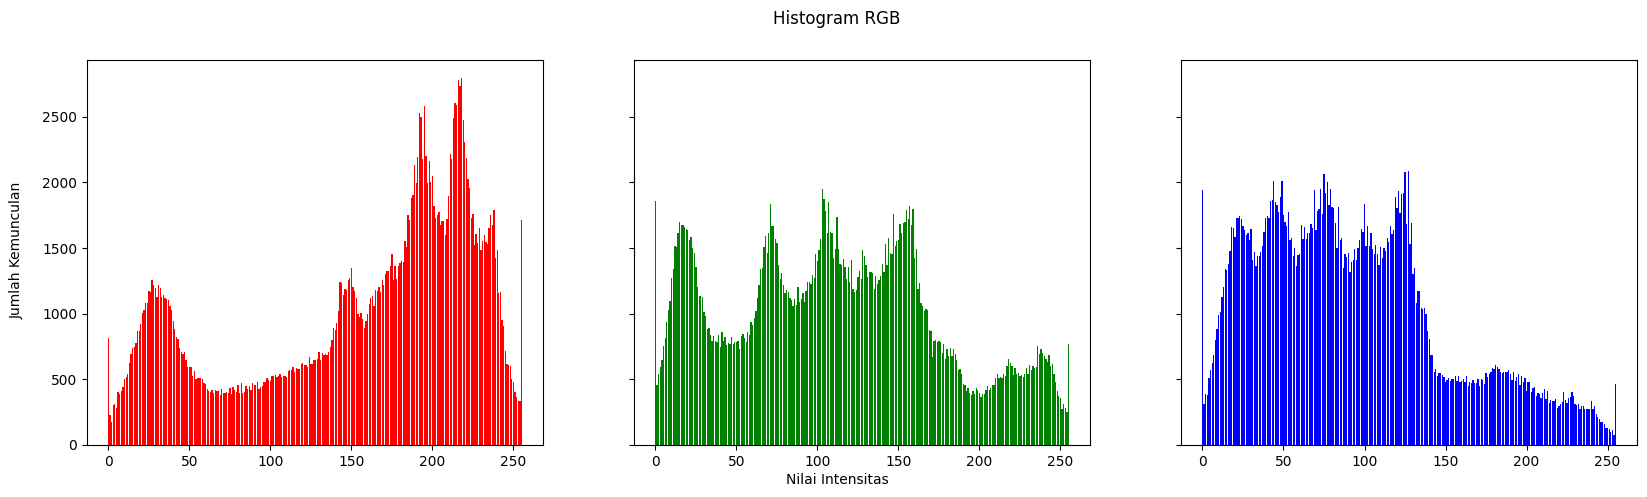

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import math
import numpy as np
import os
import glob
img = cv.imread('/content/gdrive/MyDrive/PCVK_MM/Images/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

height, width, depth = np.shape(img)
names = np.arange(256)

red = [0]*256
green = [0]*256
blue = [0]*256

for y in range(0, height):
    for x in range(0, width):
        red[img[y][x][0]] += 1
        green[img[y][x][1]] += 1
        blue[img[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', ha='center', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Nilai Intensitas', ha='center', va='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')


1. Buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh
NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?



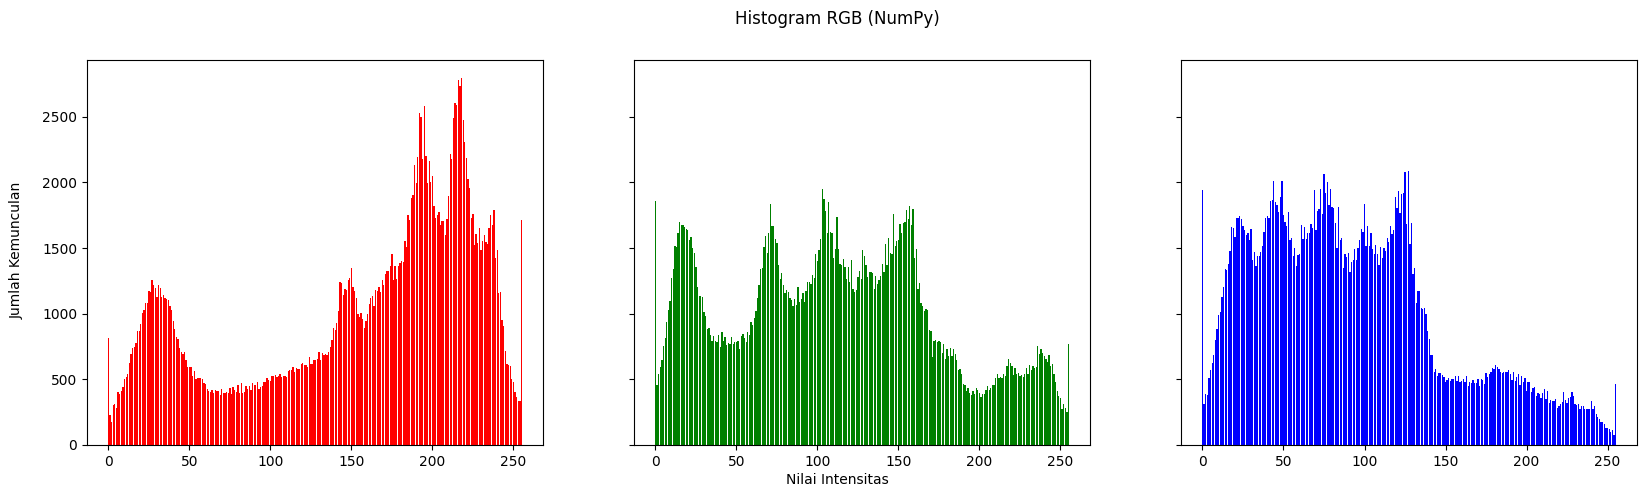

Apakah histogram manual dan numpy sama?
Red channel: True
Green channel: True
Blue channel: True


In [4]:
hist_red, bins_red = np.histogram(img[:, :, 0], bins=256, range=(0, 256))
hist_green, bins_green = np.histogram(img[:, :, 1], bins=256, range=(0, 256))
hist_blue, bins_blue = np.histogram(img[:, :, 2], bins=256, range=(0, 256))

fig2, axs2 = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
fig2.suptitle('Histogram RGB (NumPy)')
fig2.text(0.09, 0.5, 'Jumlah Kemunculan', ha='center', va='center', rotation='vertical')
fig2.text(0.5, 0.04, 'Nilai Intensitas', ha='center', va='center')
axs2[0].bar(names, hist_red, color='red')
axs2[1].bar(names, hist_green, color='green')
axs2[2].bar(names, hist_blue, color='blue')
plt.show()


2. Buatlah histogram dengan menggunakan dengan menggunakan image KTM lama.jpg.
Analisis distribusi intensitas dari histogram yang dihasilkan apakah gambar cenderung
gelap, terang, atau kontras rendah.


<BarContainer object of 256 artists>

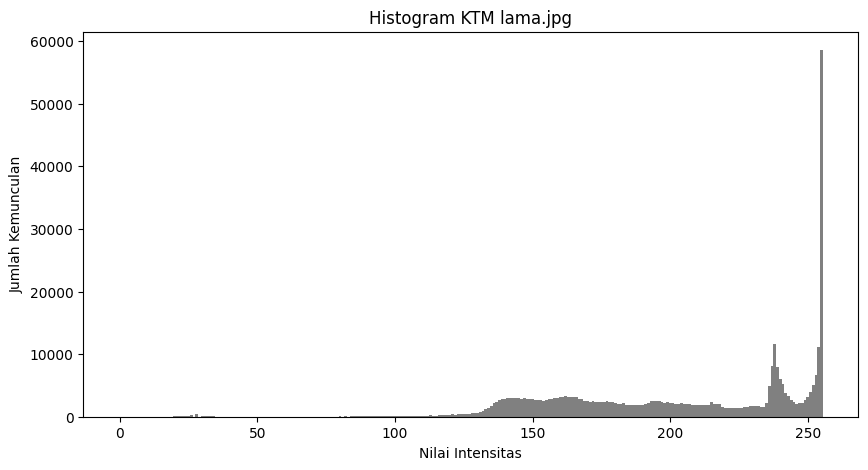

In [5]:
ktm = cv.imread('/content/gdrive/MyDrive/PCVK_MM/Images/KTM lama.jpg', cv.IMREAD_GRAYSCALE)
hist_ktm, bins_ktm = np.histogram(ktm, bins=256, range=(0, 256))
plt.figure(figsize=[10, 5])
plt.title('Histogram KTM lama.jpg')
plt.xlabel('Nilai Intensitas')
plt.ylabel('Jumlah Kemunculan')
plt.bar(bins_ktm[:-1], hist_ktm, width=1, color='gray')